In [138]:
#Librerias para analisis de datos
import numpy as np
import pandas as pd
#Librerias para procesamiento de señales
import sys
sys.path.append("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/Lib")  # Reemplaza 'ruta_completa_de_Lib' con la ruta real a la carpeta Lib
from Lib import AMI_Stergiou,AMI_Thomas,LyE_R,FNN

import statsmodels.api as sm

In [26]:
# Estabilogramas en dirección medio-lateral (ML)
CoPx1 = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test1_ml_OA.csv", header= None)
CoPx2 = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test2_ml_OA.csv", header= None)
CoPx3 = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test3_ml_OA.csv", header= None)
# Estabilograma en direccion antero-posterior (AP)
CoPy1 = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test1_ap_OA.csv", header= None)
CoPy2 = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test2_ap_OA.csv", header= None)
CoPy3 = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test3_ap_OA.csv", header= None)
# Estabilogramas concatenados dirección (ML-AP)
CoPxy1 = pd.concat([CoPx1,CoPy1],axis=1)
CoPxy2 = pd.concat([CoPx2,CoPy2],axis=1)
CoPxy3 = pd.concat([CoPx3,CoPy3],axis=1)

In [27]:

X = (CoPx1.iloc[1,:].index.values).reshape(-1, 1)
y = CoPx1.iloc[1,:].values

In [52]:
import numpy as np
from scipy.signal import resample

# Genera una señal de ejemplo (reemplaza esto con tu señal)
frecuencia_muestreo_original = 100  # Frecuencia de muestreo original en Hz
t_original = np.arange(0, 60, 1 / frecuencia_muestreo_original)
senal_original =  CoPx1.iloc[1,:].values

# Frecuencia de muestreo deseada
frecuencia_muestreo_deseada = 20  # Hz

# Calcula el factor de remuestreo
factor_remuestreo = frecuencia_muestreo_deseada / frecuencia_muestreo_original

# Realiza el remuestreo de la señal
senal_remuestreada = resample(senal_original, int(len(senal_original) * factor_remuestreo))

# Imprime las longitudes de las señales original y remuestreada
print("Longitud de la señal original:", len(senal_original))
print("Longitud de la señal remuestreada:", len(senal_remuestreada))

Longitud de la señal original: 6000
Longitud de la señal remuestreada: 1200


In [53]:
from scipy.stats import levene

# Genera dos series de tiempo dependientes de diferente tamaño (reemplaza esto con tus datos)
serie_tiempo_1 = senal_original
serie_tiempo_2 = senal_remuestreada # Tamaños diferentes

# Realiza la prueba de Levene para comparar las varianzas
estadistica_levene, p_valor_levene = levene(serie_tiempo_1, serie_tiempo_2)

# Imprime los resultados
print("Estadística de Levene:", estadistica_levene)
print("Valor p de Levene:", p_valor_levene)

# Interpreta los resultados
nivel_de_significancia = 0.05  # Nivel de significancia (por ejemplo, 0.05)
if p_valor_levene < nivel_de_significancia:
    print("Se rechaza la hipótesis nula: las varianzas son diferentes.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia de diferencias significativas en las varianzas.")




Estadística de Levene: 0.0010146924775184577
Valor p de Levene: 0.97458917607756
No se rechaza la hipótesis nula: no hay evidencia de diferencias significativas en las varianzas.


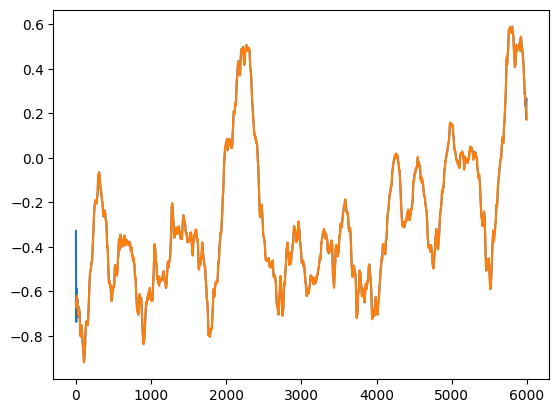

In [76]:
import matplotlib.pyplot as plt
plt.plot( np.arange(0, 6000 , 5),senal_remuestreada,)
plt.plot( np.arange(0, 6000 , 1), senal_original)

In [79]:
int(len(senal_remuestreada)**(0.5))


34

In [98]:
(tau,ami)=AMI_Stergiou.AMI_Stergiou(senal_original,3000)

In [94]:
tau

array([[5.40000000e+01, 4.01000000e+02],
       [6.70000000e+01, 1.20864597e+00],
       [7.00000000e+01, 1.19883789e+00],
       [7.50000000e+01, 1.17821139e+00],
       [7.80000000e+01, 1.16653818e+00],
       [8.80000000e+01, 1.05496242e+00],
       [9.00000000e+01, 1.05241823e+00],
       [9.20000000e+01, 1.05185237e+00],
       [9.60000000e+01, 1.04585656e+00],
       [9.80000000e+01, 1.04824206e+00],
       [1.02000000e+02, 1.04694247e+00],
       [1.04000000e+02, 1.04619588e+00],
       [1.07000000e+02, 1.05000120e+00],
       [1.12000000e+02, 1.03444561e+00],
       [1.19000000e+02, 1.01116008e+00],
       [1.26000000e+02, 9.64164011e-01],
       [1.29000000e+02, 9.64429797e-01],
       [1.35000000e+02, 9.62703440e-01],
       [1.40000000e+02, 9.57799937e-01],
       [1.50000000e+02, 1.01043761e+00],
       [1.60000000e+02, 1.05252776e+00],
       [1.72000000e+02, 1.09949942e+00],
       [1.81000000e+02, 1.14253524e+00],
       [1.83000000e+02, 1.14100497e+00],
       [1.890000

In [103]:
(tau,ami) = AMI_Thomas.AMI_Thomas(senal_remuestreada,34)	

In [104]:
tau

array([[18.        ,  0.68971196]])

In [148]:
[dim]=FNN.FNN(senal_remuestreada,tau[0],5,0.01,0.1,0)	

TypeError: only integer scalar arrays can be converted to a scalar index

In [137]:
[out,LyE] = LyE_R.LyE_R(senal_remuestreada,20,tau,dim)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
X = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 0.5

In [ ]:
X[0:1]

array([[ 0.16663381, -3.84627439, -4.25357409,  1.39255381, -0.05027426]])

In [ ]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [ ]:
model.fit(X, y)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\pysr\sr.py:1886: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\pysr\sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


In [ ]:
print(model)

PySRRegressor.equations_ = None


In [ ]:
model = PySRRegressor.from_file("hall_of_fame_2023-09-30_220114.388.pkl")

Checking if hall_of_fame_2023-09-30_220114.388.pkl exists...
Loading model from hall_of_fame_2023-09-30_220114.388.pkl


In [151]:
import sympy as sp

# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = [1, 2, 3, 4, 5]
y_data = [2, 4, 6, 8, 10]

# Símbolos para los parámetros de la regresión
a, b = sp.symbols('a b')

# Expresión simbólica para la regresión lineal
model = a * sp.Symbol('x') + b

# Función de costo (error cuadrático)
cost_function = sp.sum((model - sp.Symbol('y'))**2)

# Encuentra los valores de los parámetros a y b que minimizan el error
solution = sp.solve([sp.diff(cost_function, a), sp.diff(cost_function, b)], (a, b))

# Obtiene la expresión simbólica de la regresión
regression_expression = model.subs(solution)

# Imprime la expresión resultante
print("Expresión de regresión simbólica:", regression_expression)


AttributeError: module 'sympy' has no attribute 'sum'